In [1]:
# Scientific libraries		              
import numpy as np		              
import scipy as sp		              
import pandas as pd		              
import json		              
import missingno as msno		              

# Loading Plotting Modules		              
import matplotlib		              
import matplotlib.pyplot as plt		              
import seaborn as sns		              
%matplotlib inline		              
import chart_studio.plotly as py		              
import plotly.figure_factory as ff		              
import plotly.graph_objects as go		              
import plotly.express as px		              
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot		              
init_notebook_mode(connected=True)		              
		              
import os		              
import gc

In [2]:
# Setting Data Frame Options                      
pd.set_option('display.max_rows', 150)                      
pd.set_option('display.max_columns', 50)                      
pd.set_option('display.width', 100)                      
pd.set_option('display.max_colwidth', 100)                      

# Setting Plot Configuration                      
sns.set(rc={'figure.figsize':(19,11)}, style = 'white')

In [3]:
train = pd.read_csv('../../data/train.csv')  
m, n = train.shape                
print('Data Frame: {} x {}'.format(m,n))                
train.head()

Data Frame: 3865 x 80


,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),...,"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,NaN,NaN,NaN,38.305483,681.841086,22.131436,150.259290,129.841789,12.403812,490.446400,60.121580,57.028183,69.825369,46.018230,98.216072,...,NaN,NaN,NaN,75.604799,NaN,NaN,42.616284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,152.522198,NaN,NaN,36.255559,423.973089,89.294181,117.069332,61.822590,13.054898,560.547706,58.573002,69.873905,76.752305,40.167960,88.322574,...,NaN,NaN,NaN,57.214150,57.314932,56.187355,29.908422,6.225946,44.780023,NaN,120.886080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.177926,NaN,22.785018,NaN,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,209.813266,NaN,NaN,18.093991,285.572207,57.491083,226.523760,134.558437,15.963001,555.012461,43.078497,59.462626,59.152506,91.093668,114.163995,...,NaN,NaN,NaN,76.141735,42.405827,53.927715,18.732049,4.138115,24.030945,NaN,96.626831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327.202247,47.785456,279.000175,193.228799,12.940991,766.807703,51.318372,50.535797,54.931369,92.727892,97.645232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,71.885345,NaN,NaN,34.497468,633.799718,103.562629,28.359587,51.098250,25.521926,585.434804,56.158054,85.020965,84.708158,71.493810,53.835875,...,NaN,NaN,134.967049,NaN,77.223935,75.475076,31.398393,NaN,66.674651,NaN,N

In [4]:
test = pd.read_csv('../../data/test.csv')  
m, n = test.shape                
print('Data Frame: {} x {}'.format(m,n))                
test.head()

Data Frame: 890 x 79


,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),...,Renewable energy consumption (% of total final energy consumption),"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII)
0,1007012,KK98 77,0.456086,51.562543,12236.576447,0.593325,10.414164,10.699072,0.547114,0.556267,232.621842,105.193088,64.241392,17.418350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1007012,Reticulum III,0.529835,57.228262,3431.883825,0.675407,7.239485,5.311122,0.497688,0.409969,247.580771,55.730638,46.217440,33.027886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1008016,Reticulum III,0.560976,59.379539,27562.914252,0.594624,11.774890,5.937797,0.544744,0.486167,249.798771,58.755900,48.897493,31.613362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1007012,Segue 1,0.565910,59.952390,20352.232905,0.837700,11.613621,10.067882,0.691641,0.523441,211.505060,70.176431,61.254104,34.399007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1013042,Virgo I,0.588274,55.428320,23959.704016,0.520579,10.392416,6.374637,0.530676,0.580418,234.721069,69.768692,51.316940,15.657091,1106.554194,64.382217,219.588961,129.974418,14.013421,474.877713,21.305665,59.144562,63.990109,80.409057,111.084652,...,96.028122,21309.50697,18103.974021,50.233592,86.296925,29.065459,58.562225,13.313253,NaN,42.980727,99276.25673,NaN,458.186555,79.177012,41.585873,7.357729,0.583373,0.600445,0.856158,206.674424,224.104054,NaN,7.687626,NaN,NaN


In [5]:
df = train.append(test, ignore_index=True)
df

,galactic year,galaxy,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),...,"Estimated gross galactic income per capita, male","Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
0,990025,Large Magellanic Cloud (LMC),0.628657,63.125200,27109.234310,0.646039,8.240543,NaN,NaN,NaN,NaN,NaN,NaN,38.305483,681.841086,22.131436,150.259290,129.841789,12.403812,490.446400,60.121580,57.028183,69.825369,46.018230,98.216072,...,NaN,NaN,NaN,75.604799,NaN,NaN,42.616284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052590
1,990025,Camelopardalis B,0.818082,81.004994,30166.793958,0.852246,10.671823,4.742470,0.833624,0.467873,152.522198,NaN,NaN,36.255559,423.973089,89.294181,117.069332,61.822590,13.054898,560.547706,58.573002,69.873905,76.752305,40.167960,88.322574,...,NaN,NaN,NaN,57.214150,57.314932,56.187355,29.908422,6.225946,44.780023,NaN,120.886080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.177926,NaN,22.785018,NaN,0.059868
2,990025,Virgo I,0.659443,59.570534,8441.707353,0.499762,8.840316,5.583973,0.469110,0.363837,209.813266,NaN,NaN,18.093991,285.572207,57.491083,226.523760,134.558437,15.963001,555.012461,43.078497,59.462626,59.152506,91.093668,114.163995,...,NaN,NaN,NaN,76.141735,42.405827,53.927715,18.732049,4.138115,24.030945,NaN,96.626831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.151265,6.534020,NaN,NaN,0.050449
3,990025,UGC 8651 (DDO 181),0.555862,52.333293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327.202247,47.785456,279.000175,193.228799,12.940991,766.807703,51.318372,50.535797,54.931369,92.727892,97.645232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.912194,NaN,NaN,0.049394
4,990025,Tucana Dwarf,0.991196,81.802464,81033.956906,1.131163,13.800672,13.188907,0.910341,0.918353,71.885345,NaN,NaN,34.497468,633.799718,103.562629,28.359587,51.098250,25.521926,585.434804,56.158054,85.020965,84.708158,71.493810,53.835875,...,NaN,NaN,134.967049,NaN,77.223935,75.475076,31.398393,NaN,66.674651,NaN,N

In [6]:
from missingpy import MissForest, KNNImputer

c:\python38\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [7]:
df_new = df.copy()

In [8]:
class RuleImputer:
    def __init__(self, imputer):
        if isinstance(imputer, type):
            self.imputer = imputer()
        else:
            self.imputer = imputer
    
    def impute(self, data_frame, rule_col, force=False):
        n = data_frame[rule_col].nunique()
        all_cols = data_frame.columns
        res_frame = pd.DataFrame()
        unique_cols = data_frame[rule_col].unique().tolist()
        
        for i, rule_val in enumerate(unique_cols):
            print(f"Imputing {rule_val} | {i}/{n}")
            temp = data_frame.loc[data_frame.galaxy == rule_val, :].drop(rule_col, axis=1)
            
            assert temp.shape[0] == data_frame[data_frame[rule_col] == rule_val].shape[0]
            
            if force:
                temp.dropna(how='all', axis=1, inplace=True)
            
            imputed_temp = self.imputer.fit_transform(temp)
            imputed_temp = pd.DataFrame(imputed_temp, columns=temp.columns)
            imputed_temp[rule_col] = rule_val
            
            res_frame = res_frame.append(imputed_temp, ignore_index=True)
        
        res_frame.sort_values(by=['galactic year', 'galaxy'], ascending=True, inplace=True)
        res_frame.reset_index(drop=True, inplace=True)
        return res_frame.copy()


In [9]:
%%time
params = {
    "n_jobs": -1,
    "verbose": 0
}

miss_forest = MissForest(**params)

imputer = RuleImputer(miss_forest)
imputed_df = imputer.impute(df, 'galaxy', force=True)

Imputing Large Magellanic Cloud (LMC) | 0/181
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Imputing Camelopardalis B | 1/181
Iteration: 0
Iteration: 1
Iteration: 2
Imputing Virgo I | 2/181
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Imputing UGC 8651 (DDO 181) | 3/181
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Imputing Tucana Dwarf | 4/181
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Imputing KKh 060 | 5/181
Iteration: 0
Iteration: 1
Iteration: 2
Imputing Grus II | 6/181
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Imputing UGCA 292 | 7/181
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Imputing Aquarius II | 8/181
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Imputing Andromeda XI | 9/181
Iteration: 0
Iteration: 1
Iteration: 2
Imputing Antlia Dwarf | 10/181
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Imputing IC 1613 (UGC 668) | 11/181
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Imp

Iteration: 1
Iteration: 2
Imputing NGC 3109 | 104/181
Iteration: 0
Iteration: 1
Iteration: 2
Imputing NGC 247 | 105/181
Iteration: 0
Iteration: 1
Imputing NGC 2403 | 106/181
Iteration: 0
Iteration: 1
Iteration: 2
Imputing Andromeda XXI[57] | 107/181
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Imputing Donatiello I | 108/181
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Imputing ESO 540-032 | 109/181
Iteration: 0
Iteration: 1
Iteration: 2
Imputing Draco Dwarf (DDO 208) | 110/181
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Imputing Cassiopeia II (Andromeda XXX) | 111/181
Iteration: 0
Iteration: 1
Iteration: 2
Imputing Boötes I | 112/181
Iteration: 0
Iteration: 1
Iteration: 2
Imputing Maffei 1 | 113/181
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Imputing Barnard's Galaxy (NGC 6822) | 114/181
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Imputing KKR 03 (KK98 230) | 115/181
Iteration: 0
Iteration: 1
Iteration: 2
Imputing M32 (N

c:\python38\lib\site-packages\missingpy\missforest.py:528: UserWarning:

No missing value located; returning original dataset.



Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Imputing DDO 99 (UGC 6817) | 146/181
Iteration: 0
Iteration: 1
Iteration: 2
Imputing Carina Dwarf (E206-G220) | 147/181
Iteration: 0
Iteration: 1
Iteration: 2
Imputing Leo T Dwarf | 148/181
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Imputing Tucana IV | 149/181
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Imputing Andromeda XIX[60] | 150/181
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Imputing KK98 35 | 151/181
Iteration: 0
Iteration: 1
Iteration: 2
Imputing UGC 4483 | 152/181
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Imputing KKH 12 | 153/181
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Imputing Andromeda XXIX | 154/181
Iteration: 0
Iteration: 1
Imputing Andromeda VIII | 155/181
Iteration: 0
Iteration: 1
Iteration: 2
Imputing Ursa Major II Dwarf | 156/181
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Imputing Hydrus I | 157/181
Iteration: 0
Iteration: 1
Iteration: 2
Imputing

In [18]:
df.sort_values(by=['galactic year', 'galaxy'], ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)
imputed_df['y'] = df.y

In [17]:
imputed_df.head()

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",...,"Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,Gender Inequality Index (GII),y,galaxy,Private galaxy capital flows (% of GGP),"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total"
0,990025.0,0.759989,72.020628,18445.323465,0.647025,13.819287,10.275156,0.700193,0.744757,172.455086,69.788964,56.534984,71.977811,779.140792,53.717993,136.148520,94.372591,13.486308,486.311516,46.744351,68.373831,70.009342,13.364702,97.579821,94.595420,...,NaN,101.154818,NaN,NaN,NaN,75.084941,16.992398,NaN,83391.283213,127.531343,585.233964,62.354315,31.610527,11.813392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.049214,Andromeda Galaxy (M31),55.482526,NaN
1,990025.0,0.588206,62.473456,12072.373320,0.614855,8.368089,5.066478,0.578664,0.548011,166.597596,65.947524,62.229056,34.832775,883.596591,41.490223,202.512345,138.465984,17.670232,307.683155,87.014838,64.812267,63.080870,49.771269,109.152114,167.570379,...,13010.736695,69.845859,76.245703,28.236492,63.468500,32.250699,1.544445,55.120787,114924.778620,111.219200,487.854193,74.369426,32.855526,6.259720,0.641545,0.664679,0.949618,143.210761,161.265976,12.692108,0.749825,0.053204,Andromeda I,25.466775,2.940205
2,990025.0,1.063381,93.576404,34891.830736,0.945705,15.452324,13.267036,1.013674,0.773926,63.933456,116.707970,122.187118,38.249852,1037.163377,92.323704,46.060790,28.403142,27.020113,385.343237,69.424835,90.226902,85.775754,45.632234,63.962368,68.342047,...,28592.983034,141.893726,187.765665,61.535244,87.389620,35.425402,11.236975,67.529357,136702.754440,110.946064,178.542375,153.759820,71.094685,11.243253,0.987571,1.002983,1.039653,75.673764,64.725422,21.427986,0.415242,0.167935,Andromeda II,41.716404,4.340754
3,990025.0,0.887711,72.296275,44701.171827,1.017183,13.418461,12.045101,0.851110,0.854048,104.358165,117.016403,135.064202,34.279137,876.791765,83.156931,58.667575,34.303606,26.860760,307.481700,70.093282,75.687114,86.895446,49.167477,55.694611,112.444875,...,24036.231103,132.538880,114.955851,53

In [21]:
os.makedirs('./outputs', exist_ok=True)
imputed_df.to_csv('./outputs/miss_forest_all.csv')

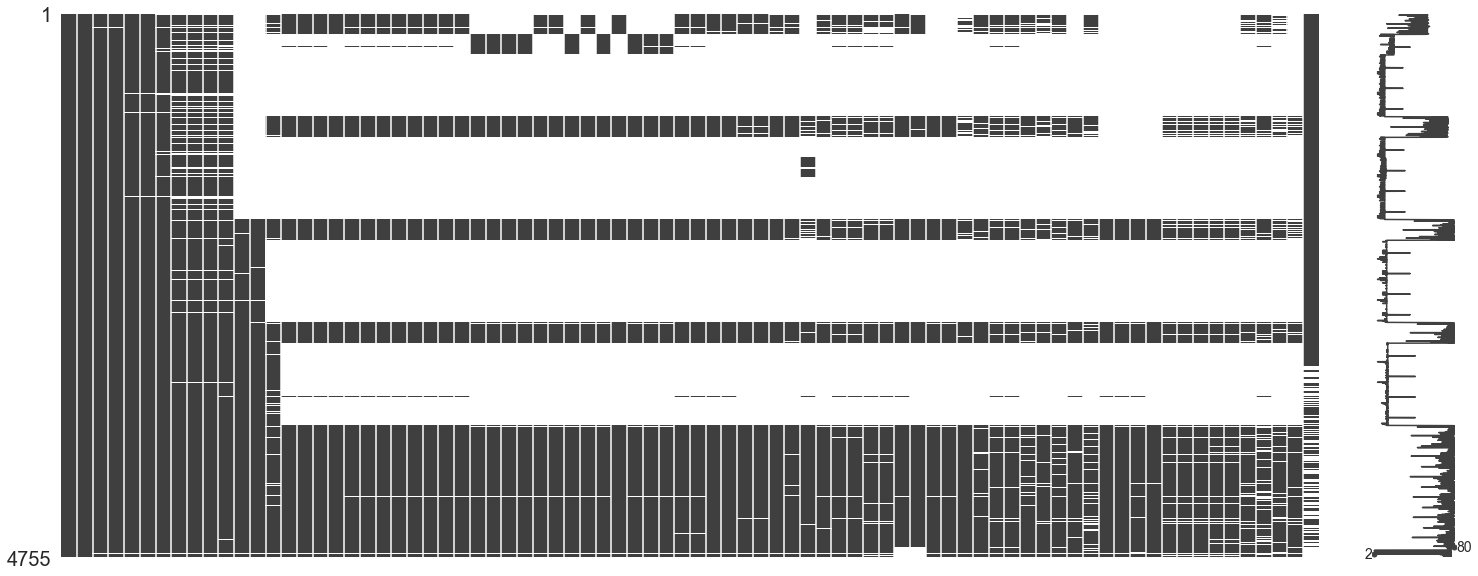

In [19]:
msno.matrix(df)

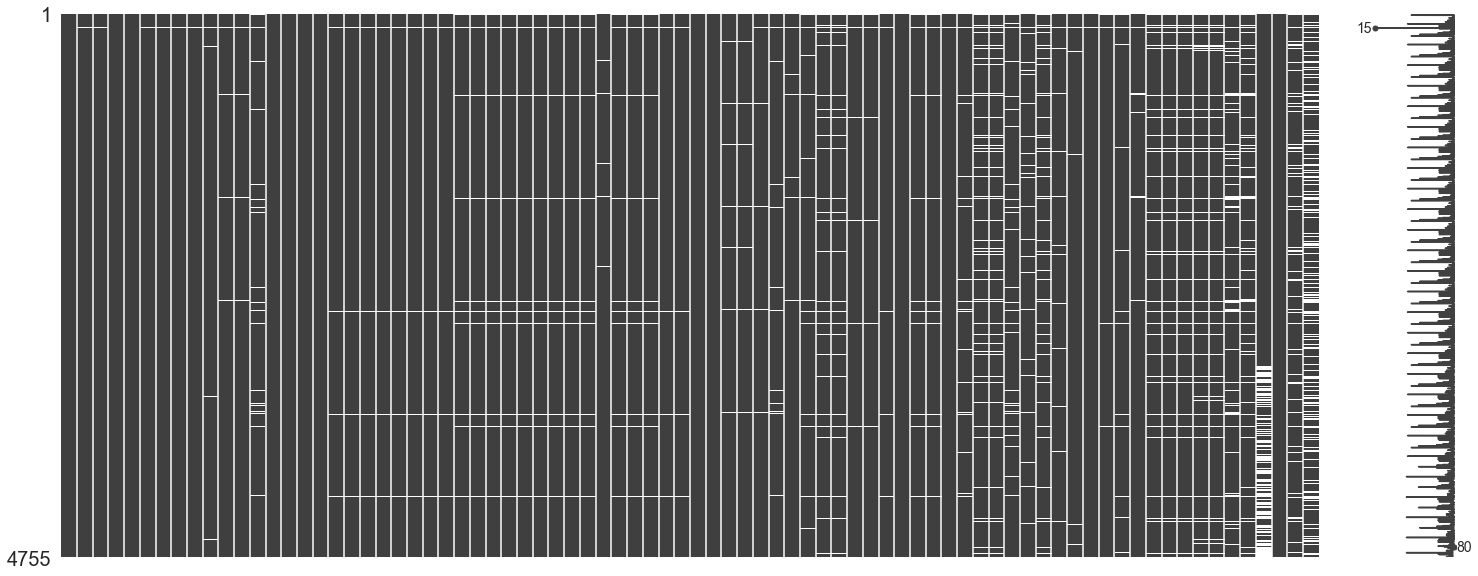

In [20]:
msno.matrix(imputed_df)

In [25]:
imputed_df[imputed_df.y.isna()]

,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",Population using at least basic drinking-water services (%),Population using at least basic sanitation services (%),Gross capital formation (% of GGP),"Population, total (millions)","Population, urban (%)","Mortality rate, under-five (per 1,000 live births)","Mortality rate, infant (per 1,000 live births)",Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64)),"Population, ages 15–64 (millions)","Population, ages 65 and older (millions)","Life expectancy at birth, male (galactic years)","Life expectancy at birth, female (galactic years)","Population, under age 5 (millions)",Young age (0-14) dependency ratio (per 100 creatures ages 15-64),"Adolescent birth rate (births per 1,000 female creatures ages 15-19)",...,"Estimated gross galactic income per capita, female",Rural population with access to electricity (%),Domestic credit provided by financial sector (% of GGP),"Population with at least some secondary education, female (% ages 25 and older)","Population with at least some secondary education, male (% ages 25 and older)",Gross fixed capital formation (% of GGP),"Remittances, inflows (% of GGP)",Population with at least some secondary education (% ages 25 and older),Intergalactic inbound tourists (thousands),"Gross enrolment ratio, primary (% of primary under-age population)","Respiratory disease incidence (per 100,000 people)",Interstellar phone subscriptions (per 100 people),"Interstellar Data Net users, total (% of population)",Current health expenditure (% of GGP),"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,Gender Inequality Index (GII),y,galaxy,Private galaxy capital flows (% of GGP),"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total"
3061,1007012.0,0.868360,72.982208,19198.499040,0.700413,16.145285,11.113581,0.719579,0.825915,181.824530,76.357958,71.796137,71.977811,819.245976,72.269765,113.394831,75.983899,12.851245,426.589757,59.793499,73.206969,79.051548,80.144699,87.255770,77.624057,...,NaN,102.306960,NaN,NaN,NaN,75.084941,16.383957,NaN,92046.182973,129.047095,578.672958,70.150003,39.261197,11.067889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andromeda Galaxy (M31),32.163414,NaN
3062,1007012.0,0.772696,73.590698,18345.350181,0.684405,12.167872,7.083681,0.650826,0.505962,193.187549,79.263683,71.723281,37.085742,849.398477,53.465398,139.090298,88.145153,14.152255,496.779346,57.583581,68.021732,74.795340,73.158109,89.776748,124.050371,...,12931.719986,99.189863,77.742674,54.263456,69.496155,38.331603,9.435519,62.266114,92843.780990,131.408452,429.753270,104.910863,34.341097,6.029590,0.673039,0.714560,0.976994,147.451303,164.334975,6.673241,0.687616,NaN,Andromeda I,30.668839,5.784397
3064,1007012.0,0.941941,81.973436,26708.317145,0.925563,18.175905,13.909442,0.960263,0.937407,74.678611,122.988241,136.685519,34.865297,712.914221,93.116852,59.810528,34.960991,31.242181,435.976780,54.971127,78.814709,87.318457,54.861556,51.049333,72.544281,...,29804.266408,133.499902,112.410524,110.028144,112.483100,29.294321,9.716045,124.671861,98471.178149,117.291927,216.424101,152.699066,89.310138,10.114774,0.975232,0.949269,1.078944,91.321283,80.725039,16.251653,0.467704,NaN,Andromeda III,25.648367,3.641324
3065,1007012.0,1.079857,89.351427,54738.000742,1.016415,19.927563,12.917355,1.085718,1.010280,65.576254,113.617318,144.223620,27.907457,994.869334,93.992349,50.614834,37.408702,39.063774,452.063178,68.716581,87.959292,90.227666,83.641251,43.621778,61.763540,...,36372.572012,140.513839,212.594379,92.0

In [33]:
imputed_train = imputed_df[imputed_df.y.notna()].reset_index(drop=True).copy()
imputed_test = imputed_df[imputed_df.y.isna()].reset_index(drop=True).copy()
del imputed_test['y']

In [34]:
imputed_train.to_csv('./outputs/imputed_train_mf.csv', index=False)
imputed_test.to_csv('./outputs/imputed_test_mf.csv', index=False)